In [60]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

In [61]:
# Load the data into a dataframe
symbol = yf.Ticker('BTC-USD')
df_btc = symbol.history(interval="1d", period="max")

In [62]:
# Delete unnecessary columns
del df_btc["Dividends"]
del df_btc["Stock Splits"]

In [63]:
change = df_btc["Close"].diff()
change.dropna(inplace=True)

In [64]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

# Identify gains and losses
change_up[change_up < 0] = 0
change_down[change_down > 0] = 0

# Verify that we did not make any mistakes
assert change.equals(change_up + change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()



In [65]:
rsi = 100 * avg_up / (avg_up + avg_down)


In [66]:
# Set the theme of our chart
plt.style.use('fivethirtyeight')

# Make our resulting figure much bigger
plt.rcParams['figure.figsize'] = (20, 20)

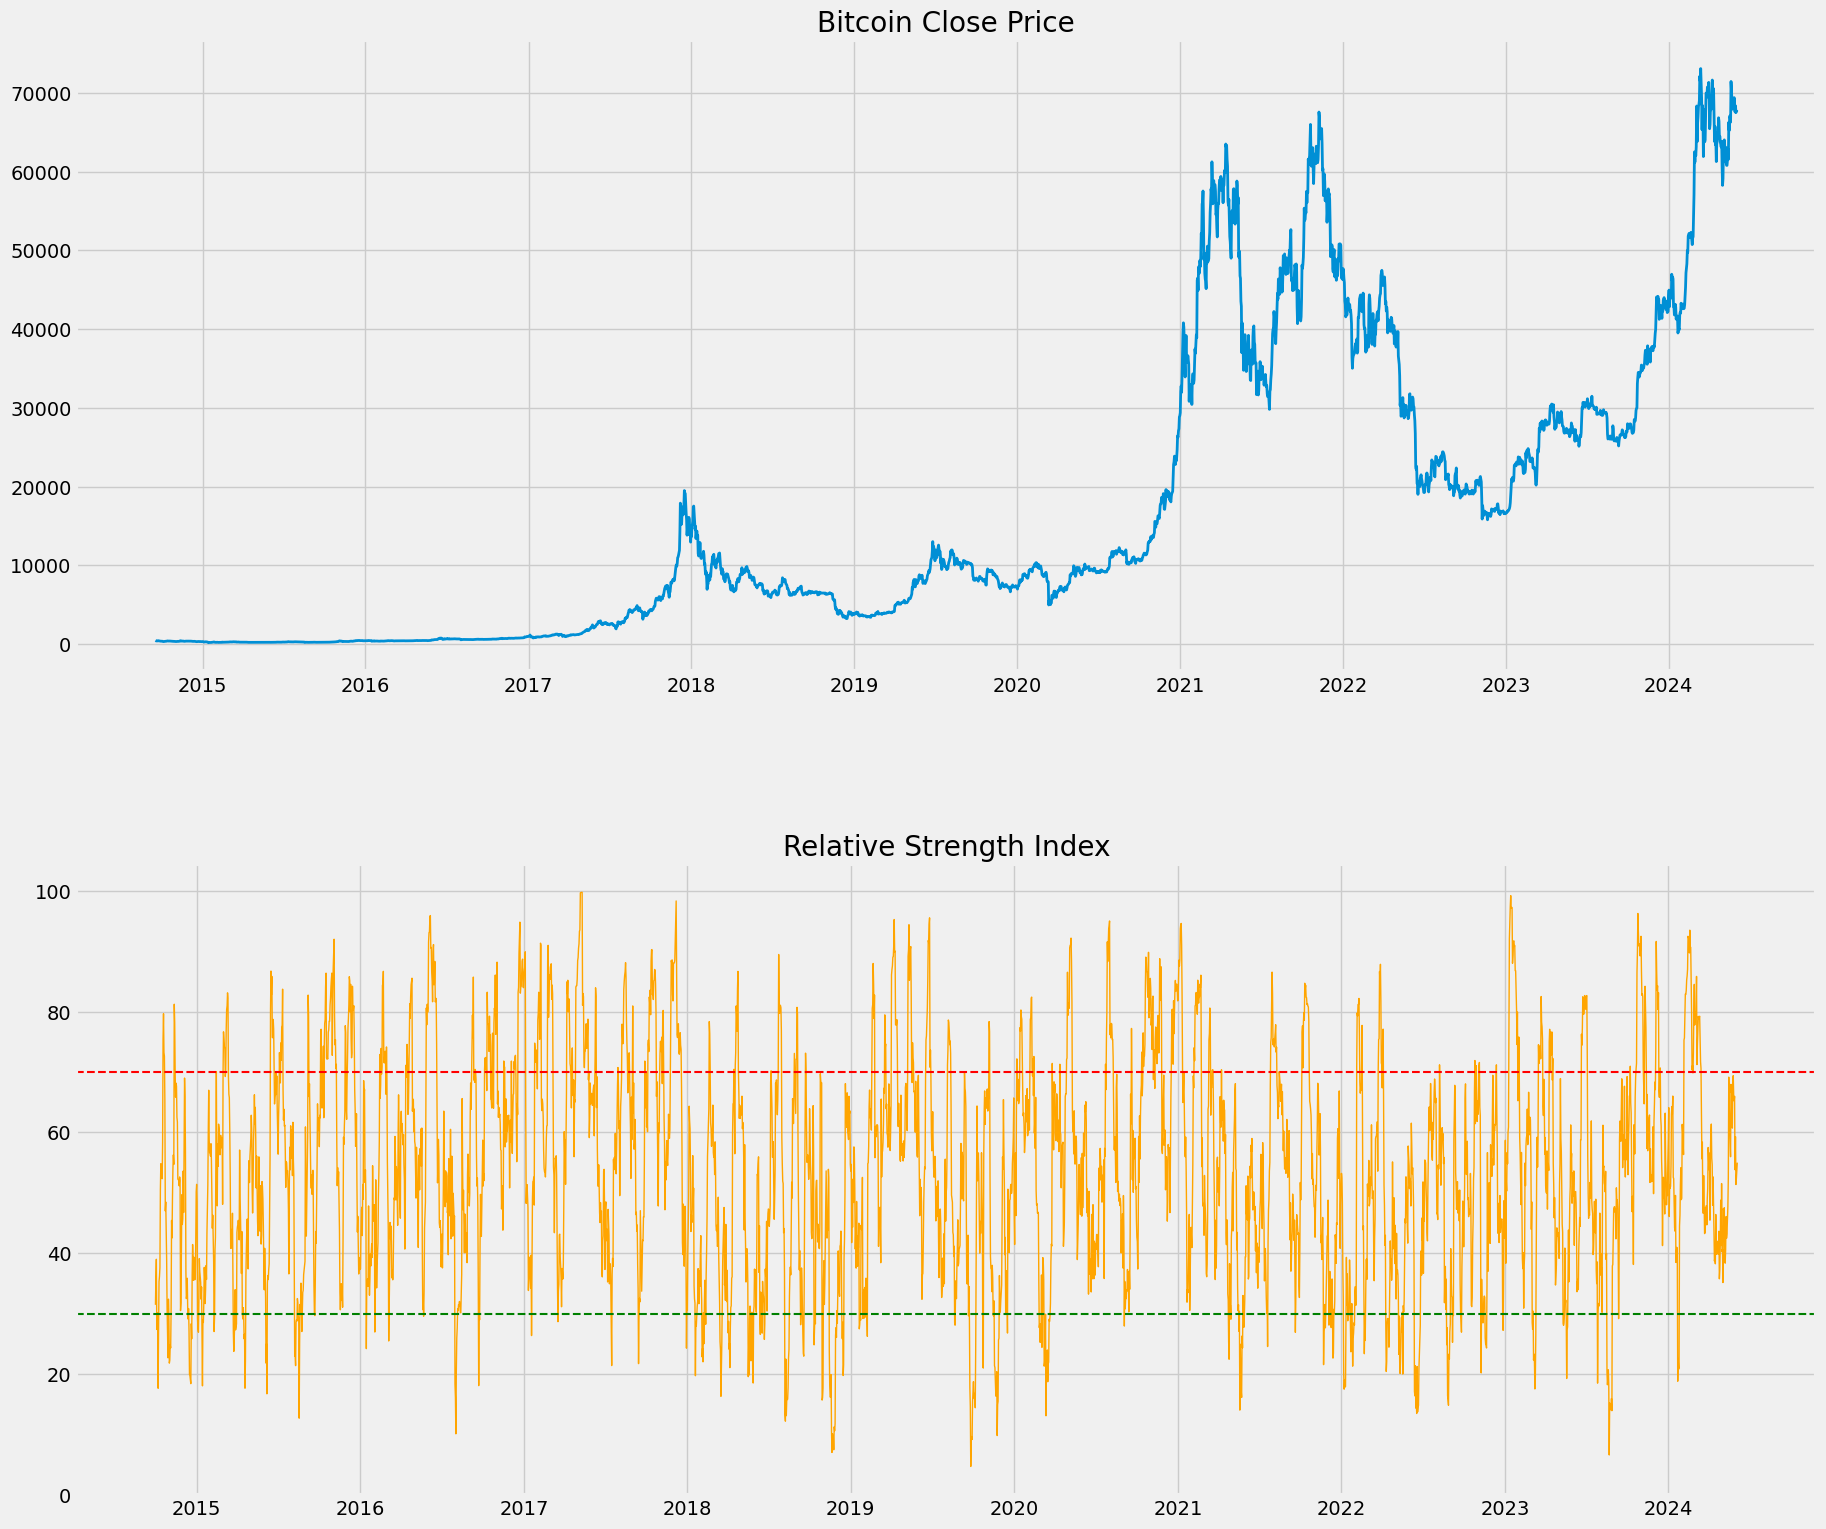

In [67]:
# Create two charts on the same figure.
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(df_btc['Close'], linewidth=2)
ax1.set_title('Bitcoin Close Price')

# Second chart
# Plot the RSI
ax2.set_title('Relative Strength Index')
ax2.plot(rsi, color='orange', linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')

In [68]:
plt.show()